<a href="https://colab.research.google.com/github/busgandy/Global-AI-Hub/blob/main/Lesson%205%20(13-11-20)/Project%202/19-11-2020%20ML%20Course%20Nigeria%20Project%20'Busayo%20Olushola'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Busayo Olushola</h2>

# Data

In [134]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [135]:
# Read csv
data = pd.read_csv("https://github.com/busgandy/Global-AI-Hub/blob/main/Lesson%205%20(13-11-20)/Project%202/Data/winequality.csv?raw=trie")
display(data)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [136]:
# Describe our data for each feature and use .info() for get information about our dataset
data.info()
# Analyse missing values
print("\nNumber of missing values: \n")
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Number of missing values: 



fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [137]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

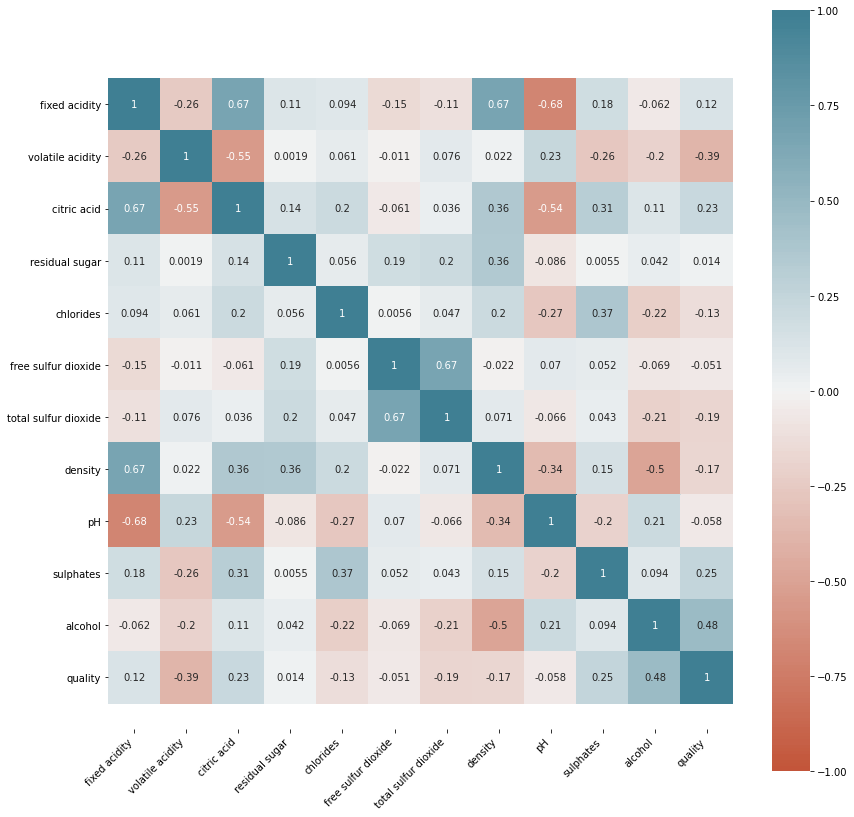

In [138]:
# Correlation of the features
import seaborn as sns
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

# Exploratory Data Analysis

In [139]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Text(0.5, 0, 'Quality')

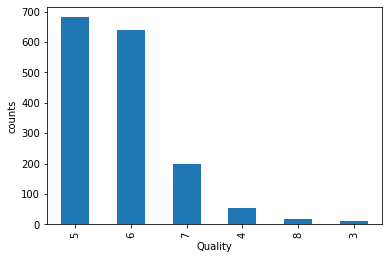

In [140]:
data["quality"].value_counts().plot.bar()
plt.ylabel('counts')
plt.xlabel('Quality')

In [141]:
# Our label Distribution (countplot)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'counts')

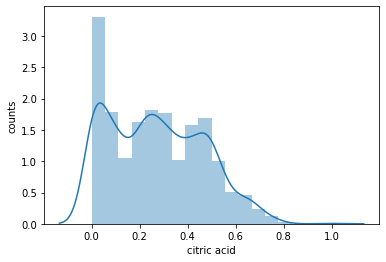

In [142]:
sns.distplot(data["citric acid"])
plt.ylabel("counts")

In [143]:
# Example EDA (distplot)


# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [144]:
data.duplicated().sum()

240

In [145]:
help(data.duplicated)

Help on method duplicated in module pandas.core.frame:

duplicated(subset:collections.abc.Hashable=None, keep:Union[str, bool]='first') -> 'Series' method of pandas.core.frame.DataFrame instance
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series
        Boolean series for each duplicated rows.
    
    See Also
    --------
    Index.duplicated : Equivalent method on index.
    

In [146]:
data.duplicated().sum()

240

In [147]:
help(data.drop_duplicates)

Help on method drop_duplicates in module pandas.core.frame:

drop_duplicates(subset:collections.abc.Hashable=None, keep:Union[str, bool]='first', inplace:bool=False, ignore_index:bool=False) -> Union[_ForwardRef('DataFrame'), NoneType] method of pandas.core.frame.DataFrame instance
    Return DataFrame with duplicate rows removed.
    
    Considering certain columns is optional. Indexes, including time indexes
    are ignored.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to keep.
        - ``first`` : Drop duplicates except for the first occurrence.
        - ``last`` : Drop duplicates except for the last occurrence.
        - False : Drop all duplicates.
    inplace : bool, default False
        Whether to drop duplicates in place or

In [148]:
# delete duplicate rows
data.drop_duplicates(inplace=True)

In [149]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [150]:
data.duplicated().sum()

0

In [151]:
display(data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [152]:
new_data = data.reset_index(drop=True)

In [153]:
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [154]:
display(new_data)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [155]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(new_data))
z



array([[0.52443096, 0.93200015, 1.39325797, ..., 0.57856134, 0.95437429,
        0.7570404 ],
       [0.29406274, 1.91580043, 1.39325797, ..., 0.12482157, 0.5845748 ,
        0.7570404 ],
       [0.29406274, 1.25993358, 1.18861732, ..., 0.05102416, 0.5845748 ,
        0.7570404 ],
       ...,
       [1.38831178, 0.11216658, 0.88165635, ..., 0.59374351, 0.7097234 ,
        0.45762065],
       [1.38831178, 0.63139451, 0.77933603, ..., 0.3006673 , 0.21477532,
        0.7570404 ],
       [1.33071973, 1.19956712, 1.01126962, ..., 0.00759108, 0.52482366,
        0.45762065]])

In [156]:
outliers = list(set(np.where(z > 3)[0]))
len(outliers)


127

In [157]:
data_new = new_data.drop(outliers,axis = 0).reset_index(drop = True)
display(data_new)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1227,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1228,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1229,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1230,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
std = StandardScaler()

In [160]:
df = std.fit_transform(data_new.drop(columns = ["quality"]))

In [161]:
df

array([[-0.54798828,  1.0230202 , -1.39643309, ...,  1.39579596,
        -0.63286796, -0.98817892],
       [-0.30533519,  2.07014562, -1.39643309, ..., -0.80465972,
         0.29112176, -0.6028431 ],
       [-0.30533519,  1.372062  , -1.18665312, ..., -0.37876507,
         0.06012433, -0.6028431 ],
       ...,
       [-1.45793738,  0.15041568, -0.87198316, ...,  1.4667784 ,
         0.90711492,  0.7458323 ],
       [-1.45793738,  0.7030652 , -0.76709317, ...,  1.8216906 ,
         0.5221192 , -0.21750727],
       [-1.3972741 , -1.24575155,  1.06848161, ...,  0.54400666,
         0.13712348,  0.55316438]])

In [162]:
data_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [163]:
df1 = pd.DataFrame(columns = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol'), data =df)

In [164]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.547988,1.023020,-1.396433,-0.579225,-0.254285,-0.448588,-0.344675,0.657710,1.395796,-0.632868,-0.988179
1,-0.305335,2.070146,-1.396433,0.270883,0.726802,1.051751,0.753876,0.074031,-0.804660,0.291122,-0.602843
2,-0.305335,1.372062,-1.186653,-0.093449,0.459233,-0.019920,0.321113,0.190766,-0.378765,0.060124,-0.602843
3,1.757216,-1.420272,1.540487,-0.579225,-0.298880,0.194414,0.520850,0.774446,-1.088589,-0.478870,-0.602843
4,-0.547988,0.790326,-1.396433,-0.700669,-0.298880,-0.234254,-0.144939,0.657710,1.395796,-0.632868,-0.988179


In [165]:
df1["quality"] = data_new["quality"]

In [166]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.547988,1.023020,-1.396433,-0.579225,-0.254285,-0.448588,-0.344675,0.657710,1.395796,-0.632868,-0.988179,5
1,-0.305335,2.070146,-1.396433,0.270883,0.726802,1.051751,0.753876,0.074031,-0.804660,0.291122,-0.602843,5
2,-0.305335,1.372062,-1.186653,-0.093449,0.459233,-0.019920,0.321113,0.190766,-0.378765,0.060124,-0.602843,5
3,1.757216,-1.420272,1.540487,-0.579225,-0.298880,0.194414,0.520850,0.774446,-1.088589,-0.478870,-0.602843,6
4,-0.547988,0.790326,-1.396433,-0.700669,-0.298880,-0.234254,-0.144939,0.657710,1.395796,-0.632868,-0.988179,5


# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.


What is machine Learning Model?

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('quality', axis=1), df1['quality'], test_size=0.3, random_state=42)

In [169]:
print(f" X_train: {X_train.shape}\n X_test: {X_test.shape}\n y_train: {y_train.shape}\n y_test: {y_test.shape}\n")

 X_train: (862, 11)
 X_test: (370, 11)
 y_train: (862,)
 y_test: (370,)



In [170]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4 , random_state=42)
dtc.fit(X_train,y_train)
print("Accuracy of train:",dtc.score(X_train, y_train))
print("Accuracy of test:",dtc.score(X_test,y_test))

Accuracy of train: 0.6647331786542924
Accuracy of test: 0.4891891891891892


Accuracy of train: 0.6647331786542924
Accuracy of test: 0.4891891891891892


**Using Decision Trees**

In [171]:

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=4 , random_state=42)
dtc.fit(X_train,y_train)
print("Accuracy of train:",dtc.score(X_train, y_train))
print("Accuracy of test:",dtc.score(X_test,y_test))

Accuracy of train: 0.6647331786542924
Accuracy of test: 0.4891891891891892


Accuracy of train: 0.6647331786542924
Accuracy of test: 0.4891891891891892

In [172]:
from concurrent.futures import ThreadPoolExecutor
from sklearn.metrics import classification_report, confusion_matrix

def model_testing(md):
    with ThreadPoolExecutor(max_workers=2) as executor:
        executor.submit(md.fit, X_train, y_train)
    print("Training Accuracy: ", md.score(X_train, y_train), '\n')
    print("Testing Accuracy: ", md.score(X_test, y_test), '\n')
    print(classification_report(y_test, md.predict(X_test)))
    return md.predict(data.drop(columns=['quality']))

**Using Logistic Regression**

In [173]:
from sklearn.linear_model import LogisticRegression

In [174]:
log = LogisticRegression(solver="liblinear", C=10)

In [175]:
model_testing(log)

Training Accuracy:  0.6206496519721578 

Testing Accuracy:  0.572972972972973 

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        19
           5       0.65      0.78      0.71       156
           6       0.50      0.57      0.53       141
           7       0.43      0.22      0.29        45
           8       0.00      0.00      0.00         9

    accuracy                           0.57       370
   macro avg       0.32      0.31      0.31       370
weighted avg       0.52      0.57      0.54       370



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([5, 5, 5, ..., 5, 5, 5])

# Evaluation

- Select the best performing model and write your comments about why choose this model.
- Analyse results and make comment about how you can improve model.